In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
fb = pd.read_csv('D:\\BI_DA\\facebook_dataset.csv', sep=',',  on_bad_lines='skip')
gd = pd.read_csv('D:\\BI_DA\\google_dataset.csv', sep=',',  on_bad_lines='skip')
wd = pd.read_csv('D:\\BI_DA\\website_dataset.csv', sep=';',  on_bad_lines='skip')

C:\Users\37544\AppData\Local\Temp\ipykernel_8948\1170719700.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  gd = pd.read_csv('D:\\BI_DA\\google_dataset.csv', sep=',',  on_bad_lines='skip')


In [3]:
for i in [fb, gd, wd]:
    display(i.head())
    display(i.info())
    print(i.duplicated().sum())

,domain,address,categories,city,country_code,country_name,description,email,link,name,page_type,phone,phone_country_code,region_code,region_name,zip_code
0,euro-hygiene-34.fr,"134 rue entrepreneurs, za du vigné, 30420, cal...",NaN,calvisson,fr,france,NaN,NaN,https://euro-hygiene-34.fr,Euro Hygiène,LocalBusiness,NaN,NaN,occ,occitanie,30420
1,lakesidehomeservices.ca,NaN,Appliance Repair & Maintenance|Home Builders &...,NaN,ca,NaN,NaN,NaN,https://lakesidehomeservices.ca,Lakeside Home Services,LocalBusiness,1.613832e+10,ca,NaN,NaN,NaN
2,rossiterboats.com,NaN,Boats & Yachts Dealers|Boat Tours & Cruises,NaN,NaN,NaN,At Rossiter Boats we build semi-custom power b...,info@rossiterboats.com,http://rossiterboats.com,Rossiter Boats,LocalBusiness,NaN,NaN,NaN,NaN,NaN
3,caa-architecture.com,"601 cordova st w # 270, v6b 1g1, vancouver, bc...",Architects & Architectural Services|Other Engi...,vancouver,ca,canada,NaN,office@caa-arcitecture.com,http://caa-architecture.com,Chandler Associates Architecture Inc.,LocalBusiness,1.604687e+10,ca,bc,british columbia,v6b 1g1
4,apexsurety.ca,"unit 3 - 4 donald street, r3l 2t7, winnipeg, m...",NaN,winnipeg,ca,canada,NaN,NaN,https://apexsurety.ca,Apex Surety & Insurance Ltd.,LocalBusiness,1.204560e+10,ca,mb,manitoba,r3l 2t7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71167 entries, 0 to 71166
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   domain              71167 non-null  object 
 1   address             56690 non-null  object 
 2   categories          54593 non-null  object 
 3   city                44567 non-null  object 
 4   country_code        57191 non-null  object 
 5   country_name        44865 non-null  object 
 6   description         27189 non-null  object 
 7   email               19753 non-null  object 
 8   link                71167 non-null  object 
 9   name                71167 non-null  object 
 10  page_type           71163 non-null  object 
 11  phone               44349 non-null  float64
 12  phone_country_code  37551 non-null  object 
 13  region_code         44562 non-null  object 
 14  region_name         44562 non-null  object 
 15  zip_code            35623 non-null  object 
dtypes: f

None

0


,address,category,city,country_code,country_name,name,phone,phone_country_code,raw_address,raw_phone,region_code,region_name,text,zip_code,domain
0,"28 Central Coast Hwy, West Gosford NSW 2250, A...",Fabric-Based Home Goods,gosford,au,australia,Spotlight West Gosford,+61243355946,au,"West Gosford NSW, Australia",+61 2 4335 5946,nsw,new south wales,"4.1 (766) · Craft store West Gosford NSW, Aust...",2250,spotlightstores.com
1,"400 Scott St, St. Catharines, ON L2M 3W2, Canada",Book Stores,st. catharines,ca,canada,Heritage Christian Book Store,+19059374553,ca,400 Scott St · In Grantham Plaza,+1 905-937-4553,on,ontario,4.7 (100) · Book store 400 Scott St · In Grant...,l2m 3w2,bookmanager.com
2,"191 Pleasant St, Yarmouth, NS B5A 2J9, Canada",Other Building Material Retailers,yarmouth,ca,canada,Pleasant Timber Mart,+19027429181,ca,"7+ years in business · Yarmouth, NS, Canada",+1 902-742-9181,ns,nova scotia,4.7 (40) · Building materials store 7+ years i...,b5a 2j9,timbermart.ca
3,"11040 Santa Monica Blvd Suite 370, Los Angeles...",Plastic Surgery Clinics,los angeles,us,united states,Skin Specifics Medical Spa West LA,+18184268353,us,7+ years in business · 11040 Santa Monica Blvd...,+1 818-426-8353,ca,california,4.3 (15) · Medical spa 7+ years in business · ...,90025,linktr.ee
4,NaN,Catering & Delivery,NaN,NaN,NaN,Lakay express,NaN,NaN,NaN,NaN,NaN,NaN,5.0 (1) · Mobile caterer Open ⋅ Closes 9PM,NaN,linktr.ee


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346925 entries, 0 to 346924
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   address             321315 non-null  object
 1   category            295862 non-null  object
 2   city                302199 non-null  object
 3   country_code        295361 non-null  object
 4   country_name        302235 non-null  object
 5   name                346894 non-null  object
 6   phone               314789 non-null  object
 7   phone_country_code  234104 non-null  object
 8   raw_address         302909 non-null  object
 9   raw_phone           318977 non-null  object
 10  region_code         302049 non-null  object
 11  region_name         302054 non-null  object
 12  text                343411 non-null  object
 13  zip_code            265646 non-null  object
 14  domain              346923 non-null  object
dtypes: object(15)
memory usage: 39.7+ MB


None

0


,root_domain,domain_suffix,language,legal_name,main_city,main_country,main_region,phone,site_name,tld,s_category
0,converterman.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,clothesencounter.ca,ca,en,NaN,cardigan,canada,prince edward island,13066937766,Clothes Encounter,ca,Shoes & Other Footwear Stores
2,investa.com.au,com.au,en,Investa Wholesale Funds Management Limited,brisbane,australia,queensland,61282269300,Investa Property Group,au,Real Estate Developers
3,timminsgarage.com,com,en,Timmins Garage Inc.,timmins,canada,ontario,18775896640,Timmins Garage,com,Automobile Dealers & Manufacturers
4,destinate.ca,ca,en,Destinate Group Ltd.,NaN,Canada,NaN,NaN,Destinate Group,ca,Business Consulting


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72018 entries, 0 to 72017
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   root_domain    72017 non-null  object
 1   domain_suffix  71900 non-null  object
 2   language       66826 non-null  object
 3   legal_name     31989 non-null  object
 4   main_city      60966 non-null  object
 5   main_country   64869 non-null  object
 6   main_region    60933 non-null  object
 7   phone          65640 non-null  object
 8   site_name      68714 non-null  object
 9   tld            71757 non-null  object
 10  s_category     70634 non-null  object
dtypes: object(11)
memory usage: 6.0+ MB


None

0


In [4]:
merged_fb_gd = fb.merge(gd, on='domain', how='outer')

In [5]:
# Затем объедините результат с данными из wd, используя столбец 'root_domain'
merged_data = merged_fb_gd.merge(wd, left_on='domain', right_on='root_domain', how='outer')

In [6]:
columns_to_drop = ["city_x", "country_code_x", "country_name_x", "country_code_y", "country_name_y", 'region_code_y', 'name_x','zip_code_x', 'address_y','phone_y','phone_x', 'city_y', 'name_y', 'region_name_y','region_name_x', 'categories', 'description', 'email','link', 'page_type', 'category', 'text', 'phone_country_code_x', 'region_code_x', 'phone_country_code_y', 'zip_code_y', 'language', 'domain', 'root_domain', 'domain_suffix',  'site_name', 'raw_address', 'raw_phone']
merged_data = merged_data.drop(columns_to_drop, axis=1)

In [7]:
def clean_legal_name(name):
    if isinstance(name, str):
        cleaned_name = re.sub(r'( Inc\.| Ltd\.| Ltd| LTD|[^a-zA-Z\s])', '', name)
        return cleaned_name
    else:
        return name

merged_data['legal_name'] = merged_data['legal_name'].apply(clean_legal_name)

In [8]:
merged_data['main_city'].unique()

array(['montpellier', 'stittsville', 'markdale', ..., '19059995643',
       'caye caulker', '15879834154'], dtype=object)

In [9]:
columns_to_lower = ['s_category', 'main_country', 'main_city', 'legal_name', 'address_x']

for column in columns_to_lower:
    merged_data[column] = merged_data[column].str.lower()

In [10]:
merged_data['s_category'].unique()

array(['pest services & agricultural chemicals',
       'appliance repair & maintenance', 'boats & yachts repair shops',
       'architects & architectural services',
       'liability insurance agency', 'high schools',
       'dairy products - farms & stores', 'medical supply manufacturers',
       'educational publications', 'farms & agriculture production',
       'nursing & personal care', 'auto parts manufacturers',
       'distilleries & malt processing', 'coffee & tea shops',
       'real estate - agents & managers',
       'clinics - surgeons & physicians', 'hair salons',
       'glass & mirror stores', 'bridal shops & wedding supplies',
       'auto restoration service', 'phone repair & services',
       'executive, legislative & government institutions',
       'martial arts gyms', 'auto services',
       'landscaping & lawn services', 'immigration attorneys',
       'golf courses & country clubs', 'catering & delivery',
       'preschools & kindergartens',
       'elevators 

In [11]:
merged_data.head(30)

,address_x,legal_name,main_city,main_country,main_region,phone,tld,s_category
0,"134 rue entrepreneurs, za du vigné, 30420, cal...",NaN,montpellier,france,occitanie,33467701504,fr,pest services & agricultural chemicals
1,NaN,lakeside home services,stittsville,canada,ontario,16138318840,ca,appliance repair & maintenance
2,NaN,the rossiter boat company,markdale,canada,ontario,18662513280,com,boats & yachts repair shops
3,"601 cordova st w # 270, v6b 1g1, vancouver, bc...",chandler associates architecture,vancouver,canada,british columbia,16046873325,com,architects & architectural services
4,"unit 3 - 4 donald street, r3l 2t7, winnipeg, m...",apex surety insurance,winnipeg,canada,manitoba,12045602508,ca,liability insurance agency
5,NaN,NaN,littleton,united states,colorado,17408676641,edu,high schools
6,NaN,NaN,littleton,united states,colorado,17408676641,edu,high schools
7,"307 main street, n0a 1n0, port dover, on, cana...",NaN,port dover,canada,ontario,15197181201,com,dairy products - farms & stores
8,"8623 granville street unit 143, v6p 5a2, vanco...",alpha scientific repair services,vancouver,canada,british columbia,16046903380,ca,medical supply manufacturers
9,NaN,NaN,calgary,canada,alberta,15878993095,com,educational publications


In [12]:
column_names = merged_data.columns
print(column_names)

Index(['address_x', 'legal_name', 'main_city', 'main_country', 'main_region',
       'phone', 'tld', 's_category'],
      dtype='object')


In [13]:
merged_data.to_csv('D:\BI_DA\merged_data.csv', index=False)

Страны

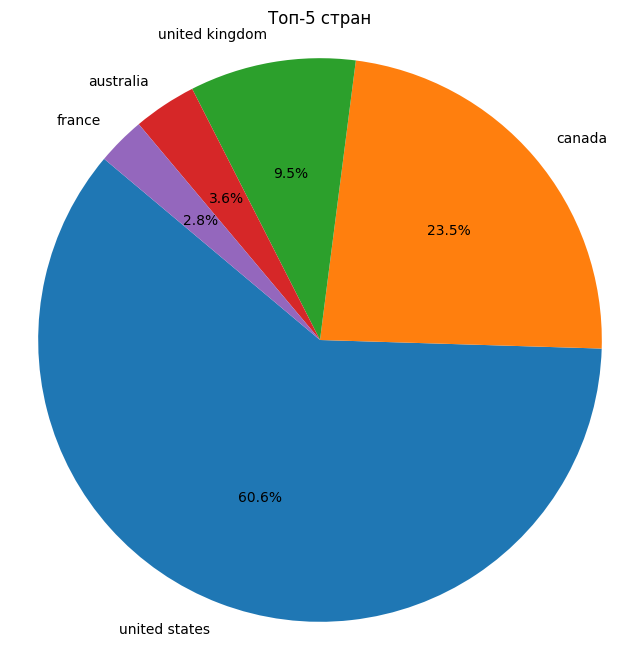

In [14]:
country_counts = merged_data['main_country'].value_counts().head(5)

plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  

plt.title('Топ-5 стран')
plt.show()

Города

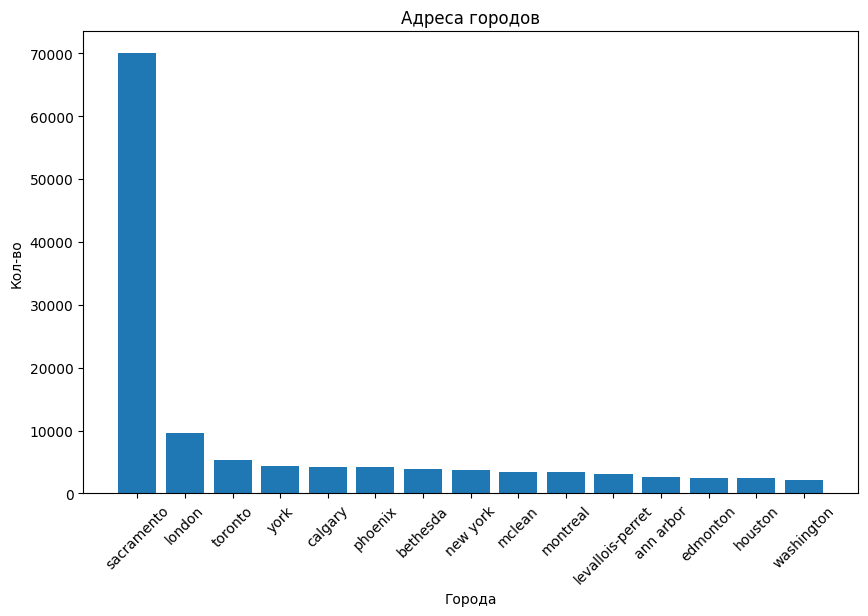

In [15]:
city_counts = merged_data['main_city'].value_counts().head(15)

plt.figure(figsize=(10, 6))
plt.bar(city_counts.index, city_counts.values)
plt.xlabel('Города')
plt.ylabel('Кол-во')
plt.title('Адреса городов')
plt.xticks(rotation=45)  
plt.show()

Категории

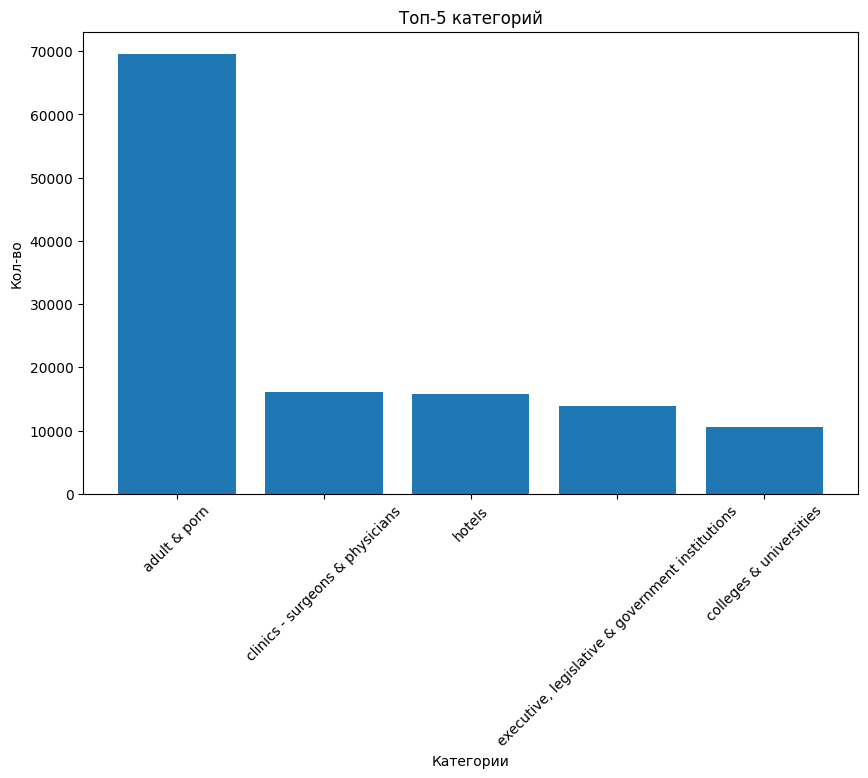

In [16]:
category_counts = merged_data['s_category'].value_counts().head(5)

# Create a bar chart (histogram) of categories
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Категории')
plt.ylabel('Кол-во')
plt.title('Топ-5 категорий')
plt.xticks(rotation=45)  
plt.show()